## Recommended System with Book libraries

*Picture this:* You’re scrolling through Netflix, unsure what to watch, and suddenly, a show you didn’t even know existed pops up in your recommendations.

Somehow, it’s exactly what you’re in the mood for. That’s the magic of recommender systems at work. From Netflix to Amazon, and even the playlists Spotify curates for you, these systems have quietly become the invisible engine that powers much of our online experience.

Now, why does this matter? Because, in today’s world, where attention spans are short and choices are endless, personalization is no longer a luxury — it’s a necessity. Companies that understand this stay ahead, while those that don’t get lost in the noise.

### Importance of Recommender Systems
The most common type of content-based recommendation system is to recommend items to users based on their profiles. The user's profile revolves around that user's preferences and tastes. It is shaped based on user ratings, including the number of times a user has clicked on different items or liked those items.

The recommendation process is based on the similarity between those items. The similarity or closeness of items is measured based on the similarity in the content of those items. When we say content, we're talking about things like the item's category, tag, genre, and so on. Essentially the features about an item.

For businesses, this means more satisfied customers and, ultimately, more revenue. Whether you’re building a new app, launching an e-commerce platform, or even running a content website, implementing a well-designed recommender system can dramatically improve your user experience.

### Objectives

This notebook explores a comprehensive approach to building a book recommendation system using the Book-Crossing dataset. The workflow includes data loading, cleaning, preprocessing, and exploratory data analysis to understand user and book distributions. Several recommendation techniques are implemented, including content-based filtering (using TF-IDF and cosine similarity), collaborative filtering (using KNN and matrix factorization with NMF), and clustering (using KMeans). Visualizations such as bar plots and word clouds are used to gain insights into the data and model results

### Load python libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#warning ignore
import warnings
warnings.simplefilter('ignore')

### Read the dataset

There 3 distincs csv files in the folder for `User_id`, `book_title` and the `ratings of the books` I'm going to load all the three file, and rename some of the column for easy readibility.

In [3]:
#load the 3 csv file
user = pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv")
books = pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv")
rating = pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")

#rename the bollow colums
rating.rename(columns={'Book-Rating':'Rating','User-ID':'User_id',},inplace=True)

user.rename(columns={'User-ID':'User_id'},inplace=True)

books.rename(columns={'Book-Title':'Title','Book-Author':'Author','Year-Of-Publication':'Year'},inplace=True)

In [4]:
print('user_dataset',user.isnull().sum())  
print('book-title dataset',books.isnull().sum())  
print('rating dataset',rating.isnull().sum())

user_dataset User_id          0
Location         0
Age         110762
dtype: int64
book-title dataset ISBN           0
Title          0
Author         2
Year           0
Publisher      2
Image-URL-S    0
Image-URL-M    0
Image-URL-L    3
dtype: int64
rating dataset User_id    0
ISBN       0
Rating     0
dtype: int64


Age column is having a lot of missing values, will delete down the line 

In [5]:
rating.head(5)

,User_id,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
user.head(5)

,User_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Exploratory data analysis(EDA)

In [7]:
print(f"rating dataseet total rows {rating.shape[0]}, and total columns {rating.shape[1]}")
print(f"user dataseet total rows {user.shape[0]}, and total columns {user.shape[1]}")
print(f"book dataseet total rows {books.shape[0]}, and total columns {books.shape[1]}")

rating dataseet total rows 1149780, and total columns 3
user dataseet total rows 278858, and total columns 3
book dataseet total rows 271360, and total columns 8


In [8]:
num_users = len(rating['User_id'].unique())
num_items = len(rating['ISBN'].unique())
print(f"There are total `{num_users}` of users and `{num_items}` items books")

There are total `105283` of users and `340556` items books


In [9]:
books.duplicated(subset=['Title']).sum()

29225

In [10]:
books.drop_duplicates(subset=['Title'], inplace=True)
books.dropna(inplace =True)

Im going to remove images columns seeing we'll not use it in this project

In [11]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1, inplace=True)


In [12]:
books.head()

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


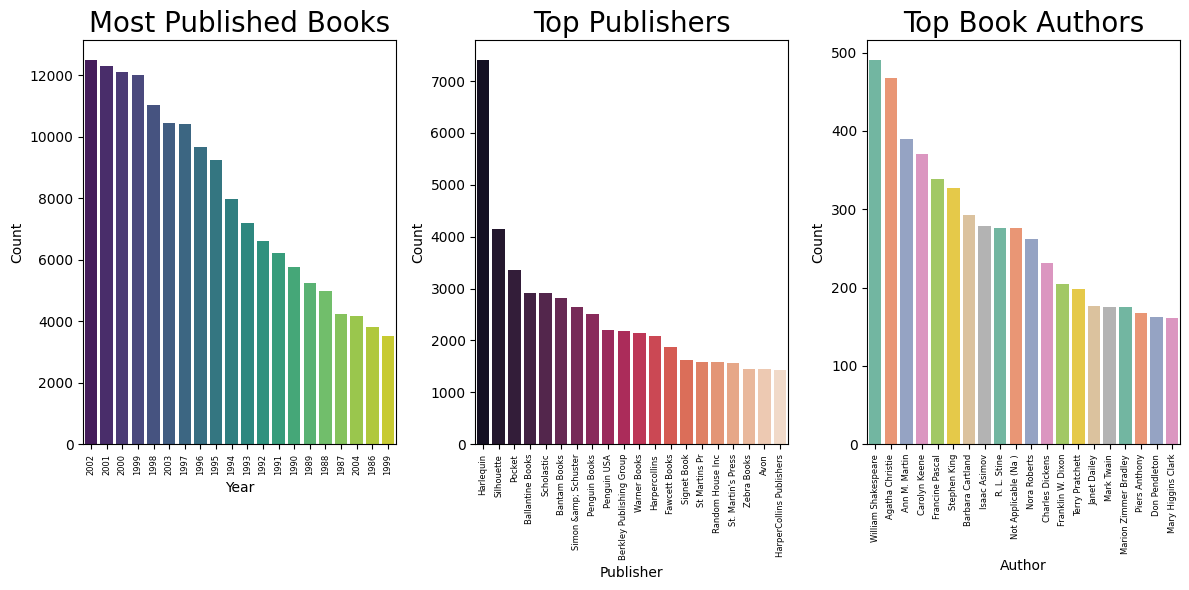

In [13]:
books_qty = books['Year'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(20)
Publisher_qty = books['Publisher'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(20)
Author_qty = books['Author'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(20)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 15 entries
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,6))

ax1 = sns.barplot(data=books_qty, x='Year', y='Count', ax=ax1, palette='viridis')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=6)
ax1.set_title('Most Published Books', size=20)

ax2 = sns.barplot(data=Publisher_qty, x='Publisher', y='Count', ax=ax2, palette='rocket')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=6)
ax2.set_title('Top Publishers', size=20)

ax3 = sns.barplot(data=Author_qty, x='Author', y='Count', ax=ax3, palette='Set2')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, fontsize=6)
ax3.set_title('Top Book Authors', size=20)

plt.tight_layout()
plt.show()


Insight:

* Year distribution 2002 is on the leading with more sale book
* Harlequin is the top Publisher almost 50% more sales than any other publisher.
* William Shakespeare the best Author since inception with more sale books to this day 

User Rating distributions

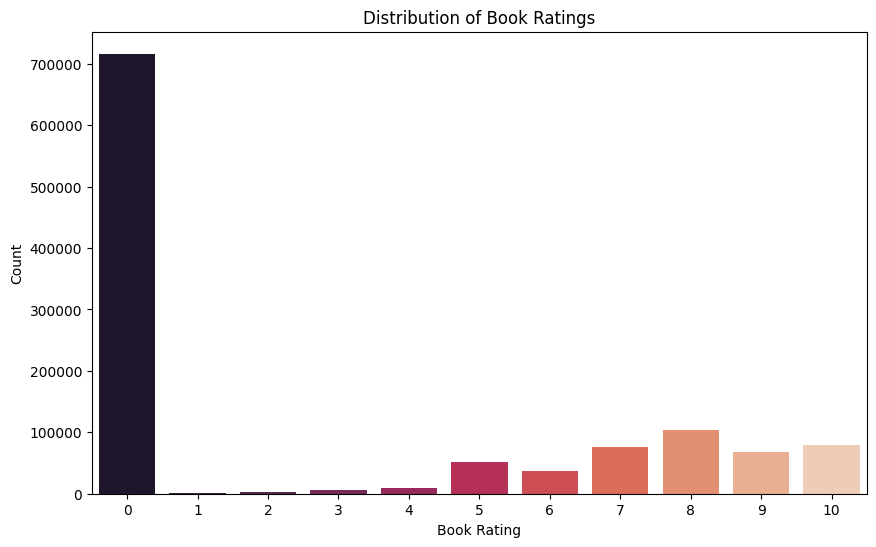

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=rating, palette='rocket')
plt.title("Distribution of Book Ratings")
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.show()

Most of the user don't have any rating 

## visualize the 20 top location of the users per user dataset

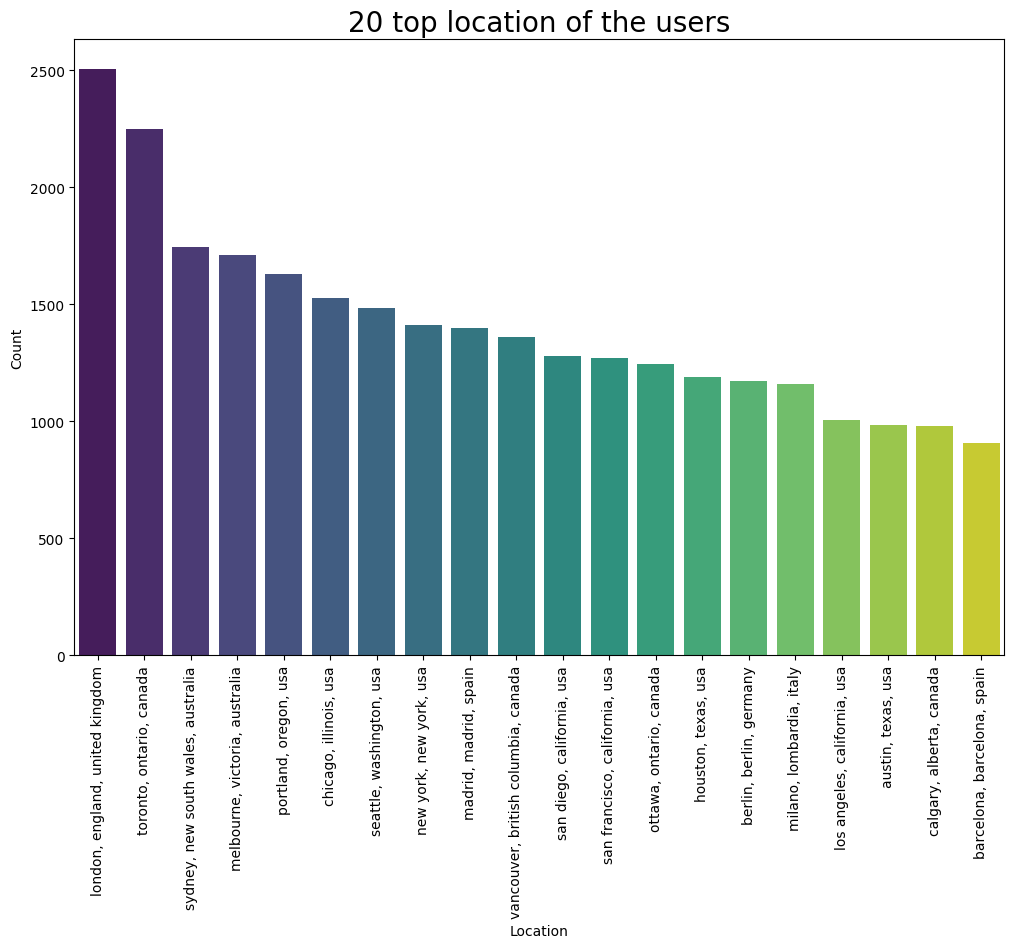

In [16]:
user_location = user['Location'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(20)

#visualize the 20 top location of the users
plt.figure(figsize=(12,8))
sns.barplot(data=user_location, x='Location', y='Count',  palette='viridis')
plt.xticks(rotation=90)
plt.title('20 top location of the users', size=20)
plt.show()


Insiht:

London and toronto canada are the best location of book sales around the cities globe and the least we have is barcelona which is spain

In [17]:
User_rating = rating.groupby(['User_id'])['Rating'].count().reset_index(name='Count').sort_values('Count', ascending=False).head(20)
User_rating

,User_id,Count
4213,11676,13602
74815,198711,7550
58113,153662,6109
37356,98391,5891
13576,35859,5850
80185,212898,4785
105111,278418,4533
28884,76352,3367
42037,110973,3100
88584,235105,3067


I'm going merge the two datasets by user ID in Pandas using the merge() function.

In [18]:
data_merged = rating.merge(books, on = 'ISBN')
#data_merged = data_merged[['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating','Publisher']]
#data_merged.reset_index(drop=True, inplace = True)

data_merged.shape

(883072, 7)

In [19]:
data_merged.head(2)

,User_id,ISBN,Rating,Title,Author,Year,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press


In [20]:
data_merged.duplicated().sum()


0

In [21]:
print(f"the average values is, {data_merged['Rating'].mean()}, and the maximum values is {data_merged['Rating'].max()}, in rating column")

the average values is, 2.832350023554138, and the maximum values is 10, in rating column


In [22]:
print(f"std values of books rating, {data_merged['Rating'].std()}")

std values of books rating, 3.8507062993454495


I'm going to clean the text column and use WordCloud for visualization, 
`Regular expressions` python librarie is a powerfull module for text manipulation in python, I'm going to use it to clean the 3 bellow columns for visualization

In [23]:
import re
#from mlxtend.preprocessing import TransactionEncoder

df = data_merged[['Title', 'Author', 'Publisher']]
# Function to clean text
def wordopt(title):
    title = title.lower()
    title = re.sub(r'[^a-z\s]', ' ', title)  # Removes non-alphabetic characters but keeps spaces
    title = re.sub(r'\b\w*\d\w*\b', ' ', title)  # Removes words containing numbers
    return title.strip()

# Apply text cleaning
for i in ['Title', 'Author', 'Publisher']:
    df[i] = df[i].apply(wordopt)


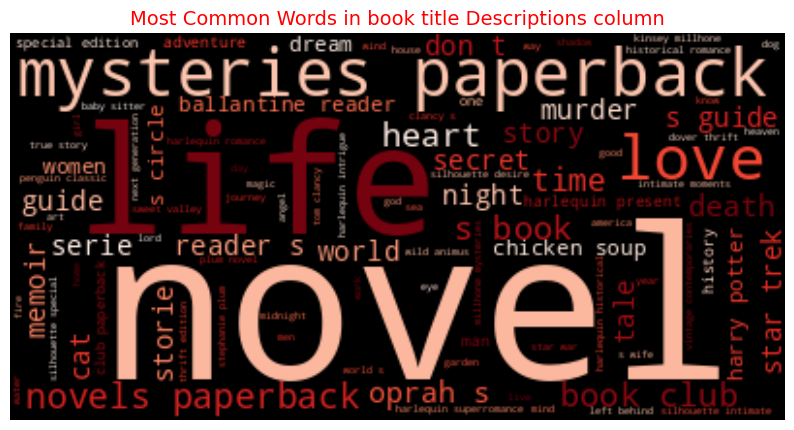

In [24]:
from wordcloud import WordCloud

titles = df['Title'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds', max_words = 200).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in book title Descriptions column', color='red', size=14)
plt.show()

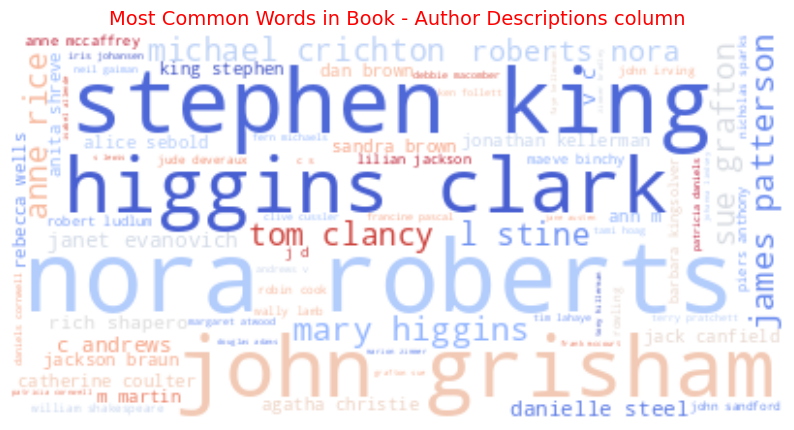

In [25]:
Author = df['Author'].values

text = ' '.join(Author)

wordcloud = WordCloud(background_color='white', colormap='coolwarm', max_words = 200).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Book - Author Descriptions column', color='red', size=14)
plt.show()

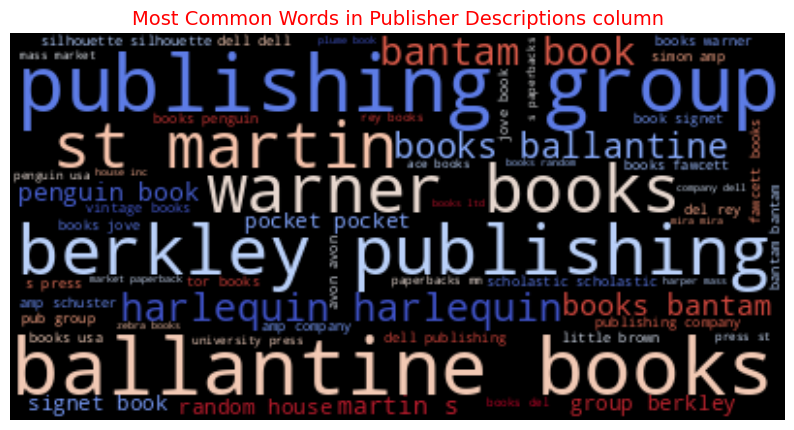

In [26]:
Publisher = df['Publisher'].values

text = ' '.join(Publisher)

wordcloud = WordCloud(background_color='black', colormap='coolwarm', max_words = 200).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Publisher Descriptions column', color='red', size=14)
plt.show()

## Recommended System with cosine_similarity

Cosine similarity is a measure of how much two vectors (or data points) are similar. It's based on the cosine of the angle between them, and it's a value between -1 and 1. A value of 1 indicates the vectors are perfectly aligned, 0 indicates they are orthogonal, and -1 indicates they point in opposite directions. 
Here's a more detailed explanation:
How it works:
Cosine similarity calculates the dot product of two vectors and divides it by the product of their magnitudes (lengths).
The result is always between -1 and 1.
The magnitude of the vectors doesn't matter; only the angle between them is important. 

### Why it's useful:
* Text analysis: Comparing the similarity of documents or text snippets.
* Recommendation systems: Finding similar items or users based on their preferences.
* Image analysis: Comparing images based on their features.
* Data clustering: Grouping similar data points together. 

In [27]:
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# Select unique book titles
df = data_merged.drop_duplicates(subset=['Title','Rating'])

# OR, if you only need the titles and not the full DataFrame
#df = pd.DataFrame(data_merged['Book-Title'].unique(), columns=['Unique Book Titles'])

df

,User_id,ISBN,Rating,Title,Author,Year,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
3,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group
4,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books
...,...,...,...,...,...,...,...
883058,276704,0380796155,5,White Abacus,Damien Broderick,1998,Eos
883063,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA
883066,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing
883068,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press


In [29]:
 # # Select unique movie titles
combined_df = df['Title'].astype(str) + ' ' + df['Rating'].astype(str)

Vectoriser = TfidfVectorizer(stop_words='english', max_features=500)
feature_vectors = Vectoriser.fit_transform(combined_df)
feature_vectors = feature_vectors[:50000]


## 1. Cosine Similarity

* We compute the cosine similarity between the TF-IDF vectors of items. Cosine similarity measures the cosine of the angle between two non-zero vectors and is used to determine how similar two items are based on their feature vectors.

In [30]:
similarity = cosine_similarity(feature_vectors)
# Print the shape of the cosine similarity matrix
print(f"Cosine Similarity Matrix Shape: {similarity.shape}")

Cosine Similarity Matrix Shape: (50000, 50000)


In [31]:
print(similarity)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.42153686 ... 0.         0.         0.        ]
 [0.         0.42153686 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.69077819 0.59205719]
 [0.         0.         0.         ... 0.69077819 1.         0.54377391]
 [0.         0.         0.         ... 0.59205719 0.54377391 1.        ]]


## Test cosine similarity

In [32]:
book_list= df['Title'].unique().tolist()


In [33]:
book_input = input('Enter the name of a book name:') #Me and You

Enter the name of a book name: Me and You


In [34]:
# finding the close match for the book name given by the user
import difflib

find_close_match = difflib.get_close_matches(book_input, book_list)
print(find_close_match)

['Me and You', 'Mean Soup', 'Meg and Mog,']


In [35]:
# finding the index of the book with title
close_match = find_close_match[0]
index_of_the_book = df[df['Title'] == close_match].index[0]

In [36]:
# getting a list of similar BOOK title
similarity_score = list(enumerate(similarity[index_of_the_book]))

# sorting the game BOOK on their similarity score
sorted_similar_game = sorted(similarity_score, key = lambda x:x[1], reverse = True)


In [37]:
# print the 5 name of similar book based on the index
i = 1

for game in sorted_similar_game:
    index = game[0]
    title_from_index = df['Title'][0]
    if (i < 6):
        print(i, '-', title_from_index)
        i += 1

1 - Flesh Tones: A Novel
2 - Flesh Tones: A Novel
3 - Flesh Tones: A Novel
4 - Flesh Tones: A Novel
5 - Flesh Tones: A Novel


## Full test the recommeded system biuld

In [46]:
# Create the index mapping properly
indices = pd.Series(df.index, index=df['Title'].str.lower()).drop_duplicates()

titles = df['Title']

def recommendations(title):
    title_lower = title.lower()

    # Check if the title exists in the dataset BEFORE accessing its index
    if title_lower not in indices:
        return "Title not found in the dataset!"

    idx = indices[title_lower]  # Retrieve index safely

    sim_scores = list(enumerate(similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:12]  # Top 11 excluding itself

    book_indices = [i[0] for i in sim_scores]

    return titles.iloc[book_indices] if book_indices else "No similar books found."


In [47]:
recommendations("The Return of the Native (Heinemann Guided Readers)")

1260                                       PURITYS PASSION
2307                                        Viking Passion
3112     Philistines at the Hedgerow: Passion and Prope...
4941                                     Freedom's Passion
6875                                 A Heritage Of Passion
11834                               The Passion of Molly T
13530                             The Passion of Artemisia
14384                         Starbucks Passion for Coffee
23305                                        Grand Passion
31142                              Barca-A Peoples Passion
34948                                   Passion of Molly T
Name: Title, dtype: object

In [48]:
recommendations("Me and You")

2346     Key of Valor (Roberts, Nora. Key Trilogy, 3.)
6439                     Vegas Sunrise (Vegas Trilogy)
9305         Forging the Darksword (Darksword Trilogy)
11149    Key of Valor (Roberts, Nora. Key Trilogy, 3.)
12057                                STARCHILD TRILOGY
14089               The Walls of Air (Darwath Trilogy)
14090         The Armies of Daylight (Darwath Trilogy)
16445     Mostly Harmless (Hitchhiker's Trilogy, No 5)
17646     Triumph of the Darksword (Darksword Trilogy)
19079                  Abhorsen (The Abhorsen Trilogy)
20114                   Sabriel (The Abhorsen Trilogy)
Name: Title, dtype: object

### 2 K-NN algorithms¶


These are algorithms that are directly derived from a basic nearest neighbors approach.

In [49]:
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from scipy.spatial.distance import cosine

Here i'm going to filter and select the user that have 30 or more rating value in this project

In [50]:
filtered_users = df.groupby(['User_id'])['Rating'].count()
filtered_users = filtered_users[filtered_users >= 30]
data = data_merged[data_merged['User_id'].isin(filtered_users.index)]

In [51]:
df = data.drop_duplicates(subset=(['User_id','Title','Rating']))
df.head(5)

,User_id,ISBN,Rating,Title,Author,Year,Publisher
116,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books
117,276847,3379015180,0,Schlafes Bruder,Robert Schneider,1994,"Reclam, Leipzig"
118,276847,3404145909,8,Der Stein der Kelten.,Michael Phillips,2001,LÃ?Â¼bbe
119,276847,3404148576,8,Nordermoor,Arnaldur Indridason,2003,LÃ?Â¼bbe
120,276847,3404921178,7,Nur der Tod ist ohne Makel.,Ann Granger,2002,LÃ?Â¼bbe


In [52]:
pivot_df = df.pivot_table(
    index="Title",
    columns="User_id",
    values="Rating",
    aggfunc='mean'  # specify the aggregation function
).fillna(0)

pivot_df.head(2)


User_id,243,254,383,507,638,643,651,741,805,882,...,278026,278137,278144,278188,278221,278356,278418,278582,278633,278843
Title,,,,,,,,,,,,,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Always Have Popsicles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I'm going to use sparse matrices from `scipy.sparse` is a great way to store large datasets efficiently when most elements are zero. It keeps memory usage low and speeds up operations like matrix multiplications—perfect for recommendation systems and machine learning tasks.

In [53]:
from scipy.sparse import csr_matrix
sparse_book = csr_matrix(pivot_df)

In [54]:
type(sparse_book)

scipy.sparse._csr.csr_matrix

I'm going to fit the sparse_book data into NearestNeighbors 

In [58]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute')
model.fit(sparse_book)

NearestNeighbors(algorithm='brute')

In [56]:
model.n_neighbors

5

In [57]:
distance, suggestion = model.kneighbors(pivot_df.iloc[456, :].values.reshape(1,-1), n_neighbors = 6)

* Activities for a Smarter Child id is 456. So i will extract this book and all columns of this 456th row.
* and reshaping this (1,-1) col 1 & 888 users will be now (172443)
* n neighbors is : no. of neighbor data points. We are finding books related to `McKenzie's Friend`

In [60]:
distance

array([[0., 0., 0., 0., 0., 0.]])

In [59]:
suggestion

array([[153829, 153830,  82693,  82689,  82694, 153827]])

In [61]:
# To see the name of the books use this id's

for i in range(len(suggestion)):
    print(pivot_df.index[suggestion[i]])

Index(['The Marble Faun (Everyman Paperback Classics)',
       'The Marble Faun (Penguin Classics)',
       'Letters, Lies, And Alibis (Delta Justice) (Delta Justice)',
       'Letters to a Young Novelist', 'Letters: A Novel',
       'The Map of Your Mind: Journeys into Creative Expression'],
      dtype='object', name='Title')


In [63]:
# LEts create an user defined function 

def recommend_book(book_name):
    book_id = np.where(pivot_df.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(pivot_df.iloc[book_id,:].values.reshape(1,-1), n_neighbors = 6)
    for i in range(len(suggestion)):
        print(pivot_df.index[suggestion[i]])

In [64]:
recommend_book('The Cat Who Said Cheese')

Index(['The Cat Who Said Cheese', 'The Complete Book of Swords',
       'Kitten in the Cold (Animal Ark, 13)',
       'Cecile: Gates of Gold (Girls of Many Lands)',
       'The Scottish Legacy (Signet Regency Romance)',
       'Dream Giver: Following Your God-Given Destiny'],
      dtype='object', name='Title')


In [65]:
recommend_book("To the Pole: Five Women in Search of an Adventure")

Index(['Swan River', 'Marilyn's almost terminal New York adventure',
       'The Stone Carvers',
       'To the Pole: Five Women in Search of an Adventure', 'The fisher child',
       'Biggles: the Untold Story'],
      dtype='object', name='Title')


## 3. Collaborative Filtering based Recommender System using Non-negative Matrix Factorization

#### Non-negative matrix factorization
In the machine learning course, you have learned a dimensionality reduction algorithm called Non-negative matrix factorization (NMF), which decomposes a big sparse matrix into two smaller and dense matrices.

Non-negative matrix factorization can be one solution to big matrix issues. The main idea is to decompose the big and sparse user-interaction into two smaller dense matrices, one represents the transformed user features and another represents the transformed item features.

In [66]:
from surprise import NMF
from surprise import Dataset, Reader


We are going to save only use id, ISBN, Book rating colomns for NMF Traing model 

In [67]:
df = df[['User_id', 'Rating', 'ISBN', 'Title']]

from sklearn.preprocessing import LabelEncoder
vector = LabelEncoder()

df['ISBN'] = vector.fit_transform(df['ISBN'])

# Define the Reader object
reader = Reader(line_format='user item rating', sep=',', skip_lines=1,rating_scale=(1, 5))
# Optionally, convert the Surprise Dataset object into a pandas DataFrame
df = pd.DataFrame(df, columns=['User_id', 'ISBN', 'Rating'])
# Load the data into Surprise format using load_from_df
data = Dataset.load_from_df(df[['User_id', 'ISBN', 'Rating']], reader)


Now we can split the dataset into train and test set

In [68]:
trainset, testset = train_test_split(data, test_size=0.3)

In [ ]:
#Let's check how many user and book item we can use to fit the KNN Model
print(f"Total {trainset.n_users} user and {trainset.n_items} items in the training set")

In [69]:
from sklearn.decomposition import NMF

nmf_model = NMF()

# Fit the model to the transformed data
W = nmf_model.fit_transform(testset)
H = nmf_model.components_

print("W (Transformed Data):\n", W)
print("H (Components Matrix):\n", H)


W (Transformed Data):
 [[0.         3.31270292 0.8728521 ]
 [0.         0.         1.31948541]
 [0.33494933 0.08808131 1.78788295]
 ...
 [0.         0.         1.05451551]
 [0.         0.44868468 1.51006132]
 [0.         0.         0.82826903]]
H (Components Matrix):
 [[1.01880612e+04 0.00000000e+00 3.69279230e-01]
 [5.92518599e+04 1.55734217e+04 2.68049459e+00]
 [8.88596284e+04 5.73481365e+04 1.08475645e-01]]


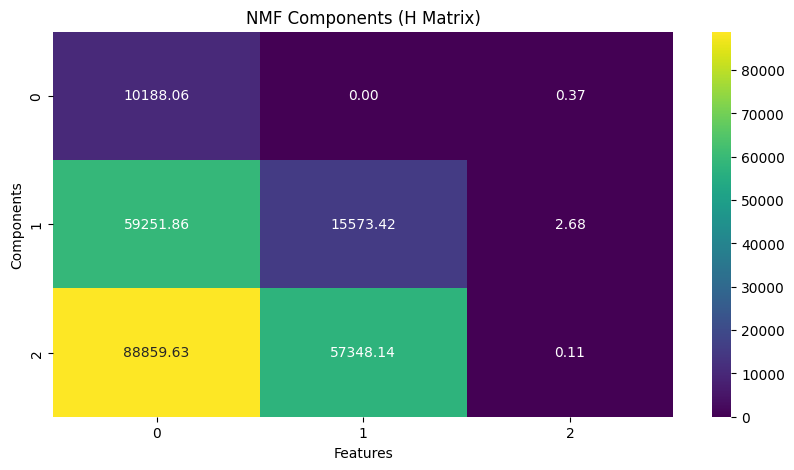

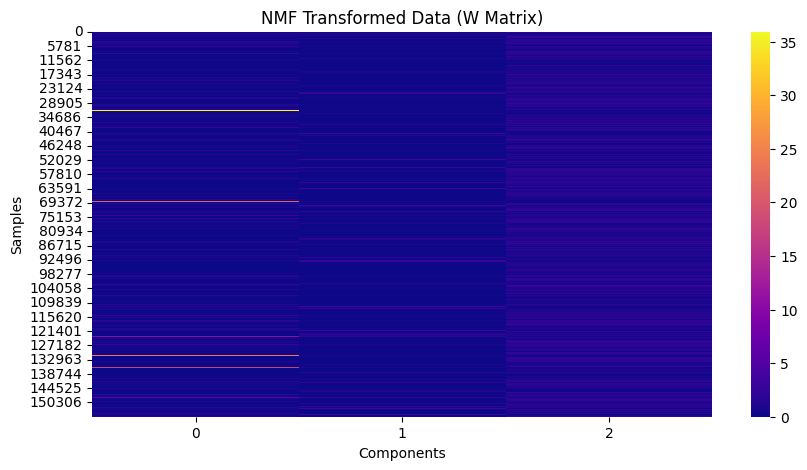

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the components matrix (H)
plt.figure(figsize=(10, 5))
sns.heatmap(H, cmap='viridis', annot=True, fmt=".2f")
plt.title("NMF Components (H Matrix)")
plt.xlabel("Features")
plt.ylabel("Components")
plt.show()

# Plot the transformed data (W) if it's interpretable
plt.figure(figsize=(10, 5))
sns.heatmap(W, cmap='plasma', annot=False)
plt.title("NMF Transformed Data (W Matrix)")
plt.xlabel("Components")
plt.ylabel("Samples")
plt.show()


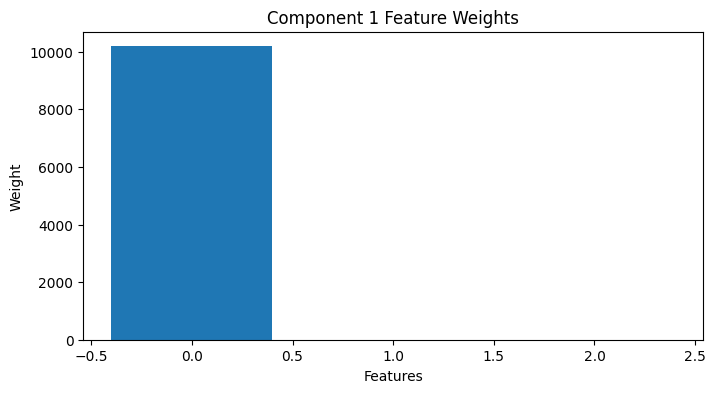

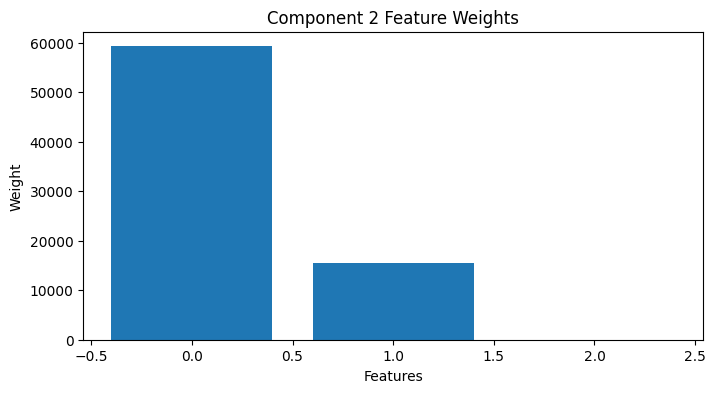

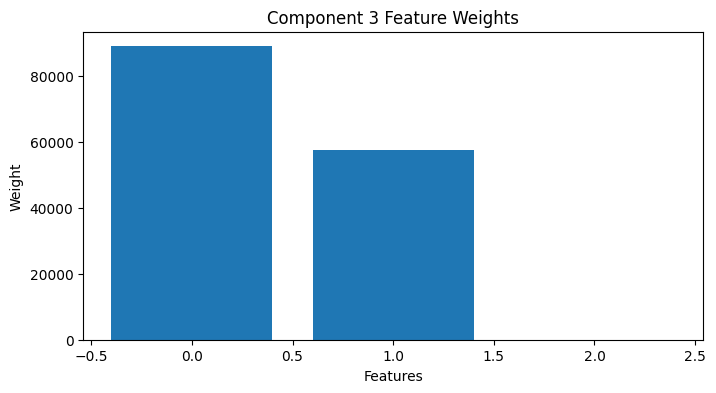

In [72]:
import matplotlib.pyplot as plt
import numpy as np

n_components = H.shape[0]
for i in range(n_components):
    plt.figure(figsize=(8, 4))
    plt.bar(range(H.shape[1]), H[i])
    plt.title(f"Component {i+1} Feature Weights")
    plt.xlabel("Features")
    plt.ylabel("Weight")
    plt.show()


## Making Predictions and Evaluating NMF model

In [73]:
from surprise import NMF

# Build the NMF model
model_NMF = NMF()
# Train the model
model_NMF.fit(trainset)

In [74]:
# Make predictions on the test set with the NMF model
predictions = model_NMF.test(testset)
# Evaluate the model
accuracy.rmse(predictions)

RMSE: 3.6111


3.6111200961043277

## Training the KNN Mode

In [75]:
#Training the KNN Mode

# Build the KNN model
sim_options = {'name': 'pearson', 'user_based': True}
model_KNN = KNNBasic(sim_options=sim_options)

# Train the model
model_KNN.fit(trainset)


Computing the pearson similarity matrix...
Done computing similarity matrix.


In [76]:
from surprise import accuracy

# Predict ratings for the test set
predictions = model_KNN.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)
# Evaluate predictions using RMSE and MAE
rmse = accuracy.rmse(predictions, verbose=True)
mae = accuracy.mae(predictions, verbose=True)


RMSE: 3.7613
RMSE: 3.7613
MAE:  3.1866


In [77]:
def predict_rating(user_index, item_index):
    return np.dot(W[user_index], H[:, item_index])

# Example: Predict rating for user 5 and item 10
predicted_rating = predict_rating(5, 2)
print("Predicted Rating:", predicted_rating)


Predicted Rating: 0.06149363457792658


## Kmeans Clustering

### Objectives

* Perform k-means clustering on the original user profile feature vectors
* Standardized data with StandarScaler fot better performance result.
* Generate course recommendations based on other group members' enrollment histor

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [79]:
# Standardize the data before clustering
scaler = StandardScaler()
user_features = pivot_df.T  # Users as rows, books as columns
user_features_scaled = scaler.fit_transform(user_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
user_clusters = kmeans.fit_predict(user_features_scaled)

# Add cluster labels to user_features DataFrame
user_features['Cluster'] = user_clusters

def recommend_books_by_cluster(user_id, n_recommendations=5):
    if user_id not in user_features.index:
        return "User not found."
    cluster_label = user_features.loc[user_id, 'Cluster']
    cluster_users = user_features[user_features['Cluster'] == cluster_label].index
    # Get books rated highly by users in the same cluster
    cluster_ratings = pivot_df[cluster_users].mean(axis=1)
    top_books = cluster_ratings.sort_values(ascending=False).head(n_recommendations)
    return top_books.index.tolist()



In [80]:
# Example usage:
recommend_books_by_cluster(user_id=277427, n_recommendations=5)

['The Lovely Bones: A Novel',
 'The Da Vinci Code',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'The Red Tent (Bestselling Backlist)']

In [81]:
recommend_books_by_cluster(user_id=11676, n_recommendations=5)

['Meet Felicity: An American Girl : 1774 (The American Girls Collection, Book 1)',
 'Silent Witness (Harlequin Superromance)',
 'Keeper of the Heart',
 'Star wars: From the adventures of Luke Skywalker : a novel',
 "Mommy, Please Don't Cry : There Are No tears in Heaven"]

## Summary

This notebook explores a comprehensive approach to building a book recommendation system using the Book-Crossing dataset. The workflow includes data loading, cleaning, preprocessing, and exploratory data analysis to understand user and book distributions. Several recommendation techniques are implemented, including content-based filtering (using TF-IDF and cosine similarity), collaborative filtering (using KNN and matrix factorization with NMF), and clustering (using KMeans). Visualizations such as bar plots and word clouds are used to gain insights into the data and model results.

## Conclusion

Through the application of multiple recommendation algorithms, this notebook demonstrates the strengths and limitations of each approach. Content-based filtering provides recommendations based on book metadata, while collaborative filtering leverages user-item interactions for more personalized suggestions. Clustering techniques help identify user groups with similar preferences, enabling group-based recommendations. The combination of these methods results in a robust recommendation system capable of handling a large and sparse dataset.

## Recommendation

For production deployment, it is recommended to:
- Further tune and evaluate the models using additional metrics and cross-validation.
- Incorporate more user and item features (such as book genres, user demographics, and implicit feedback) to improve recommendation quality.
- Regularly update the models with new data to maintain relevance.
- Consider hybrid approaches that combine content-based and collaborative filtering for better performance.
- Optimize data processing and model inference for scalability and responsiveness in a real-world application.

#### Thank you :)